In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
X=10*np.random.rand(50)
y=3*X - 8 + (np.random.randn(50)*4)

In [ ]:
X=X.reshape(-1,1)

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
pred=model.predict(X)

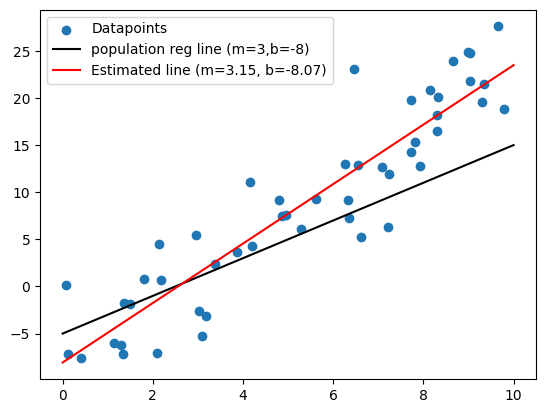

In [ ]:
plt.scatter(X,y,label='Datapoints')
x_line=np.linspace(0,10,50)
y_line=2*(x_line)-5
plt.plot(x_line,y_line,label='population reg line (m=3,b=-8)',color='black')
coef=model.coef_
intercept=model.intercept_
y_line2=intercept + coef[0]*x_line
plt.plot(x_line,y_line2,label=f"Estimated line (m={coef[0]:.2f}, b={intercept:.2f})",color='red')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

data=pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')
X=data[['TV','Radio','Newspaper']]
y=data['Sales']
model=sm.OLS(y,X).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):                   2.43e-171
Time:                        16:33:25   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(42)
n = 100
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
irrelevant_predictors = np.random.normal(0, 1, (n, 10))

y = 2 * x1 + 3 * x2 + np.random.normal(0, 1, n)

# Helper function to calculate adjusted R-squared
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Fit linear regression models with different predictors
X = pd.DataFrame({'x1': x1, 'x2': x2})
X_with_irrelevant = pd.concat([X] + [pd.Series(irrelevant_predictors[:, i], name=f"irrelevant_{i}") for i in range(10)], axis=1)

model1 = LinearRegression().fit(X, y)
model2 = LinearRegression().fit(X_with_irrelevant, y)

# Calculate R-squared and adjusted R-squared for each model
models = [('Model with relevant predictors', model1, X.shape[1]), ('Model with irrelevant predictors', model2, X_with_irrelevant.shape[1])]

for name, model, k in models:
    r2 = r2_score(y, model.predict(X_with_irrelevant.iloc[:, :k]))
    adj_r2 = adjusted_r2(r2, n, k)
    print(f"{name}: R-squared = {r2:.3f}, Adjusted R-squared = {adj_r2:.3f}")

Model with relevant predictors: R-squared = 0.912, Adjusted R-squared = 0.910
Model with irrelevant predictors: R-squared = 0.919, Adjusted R-squared = 0.908


In [ ]:
X

,x1,x2
0,0.496714,-1.415371
1,-0.138264,-0.420645
2,0.647689,-0.342715
3,1.523030,-0.802277
4,-0.234153,-0.161286
...,...,...
95,-1.463515,0.385317
96,0.296120,-0.883857
97,0.261055,0.153725
98,0.005113,0.058209


In [ ]:
X_with_irrelevant

,x1,x2,irrelevant_0,irrelevant_1,irrelevant_2,irrelevant_3,irrelevant_4,irrelevant_5,irrelevant_6,irrelevant_7,irrelevant_8,irrelevant_9
0,0.496714,-1.415371,0.357787,0.560785,1.083051,1.053802,-1.377669,-0.937825,0.515035,0.513786,0.515048,3.852731
1,-0.138264,-0.420645,0.570891,1.135566,0.954002,0.651391,-0.315269,0.758969,-0.772825,-0.236819,-0.485364,0.081874
2,0.647689,-0.342715,2.314659,-1.867265,0.686260,-1.612716,-0.471932,1.088951,0.064280,-1.077745,-0.715304,0.679598
3,1.523030,-0.802277,-0.730367,0.216459,0.045572,-0.651600,2.143944,0.633919,-2.025143,0.186454,-0.661786,0.852433
4,-0.234153,-0.161286,-0.792521,-0.114736,0.504987,0.865755,-1.200296,-0.334501,-0.474945,-0.653329,1.765454,0.404982
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.463515,0.385317,-0.991392,-2.153390,-0.638962,-1.323090,1.642015,1.009817,-0.688150,2.252436,0.981765,-0.324831
96,0.296120,-0.883857,-2.499406,2.290943,-1.389572,-1.645399,1.022570,2.439752,1.384273,0.563909,0.594754,0.853416
97,0.261055,0.153725,0.758929,0.281191,0.104201,-0.062593,-0.753965,-0.280675,-1.692957,-0.098340,-0.988591,-1.103589
98,0.005113,0.058209,0.179894,1.392002,0.918317,-1.570501,-0.989628,0.940771,-0.982487,-0.224633,0.550052,-0.968344


#`assumptions-of-linear-regression`

##`Linearity`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
x=7*np.random.rand(100,1) - 2.8
y=X=7*np.random.rand(100,1) - 2.8
z=x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

In [ ]:
df=pd.DataFrame()
df['x1']=x.reshape(100)
df['x2']=y.reshape(100)
df['y']=z.reshape(100)

In [ ]:
df

,x1,x2,y
0,3.098635,-0.518237,13.450371
1,-0.961862,-1.138607,2.815284
2,1.588702,1.130090,7.062031
3,3.948634,-0.585171,17.846558
4,3.180438,3.379776,25.624938
...,...,...,...
95,4.136782,-0.596645,19.021119
96,-0.612853,3.785515,16.095414
97,0.714324,0.069830,2.858482
98,2.977779,2.620620,19.376561


In [ ]:
print(len(df['x1']), len(df['y']))

100 100


#`scatter plot`

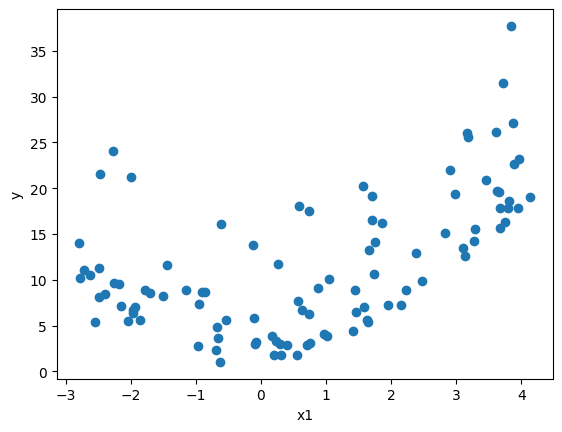

In [ ]:
plt.scatter(df['x1'], df['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

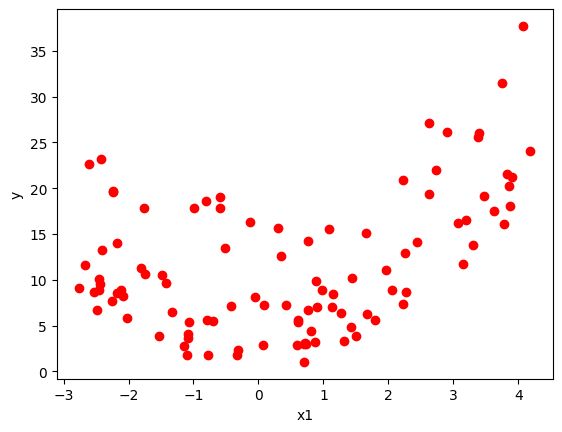

In [ ]:
plt.scatter(df['x2'], df['y'],color='red')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

#`Residual plot`

In [ ]:
X=df[['x1','x2']]
y=df['y']
lr=LinearRegression()
lr.fit(X,y)
pred=lr.predict(X)
residual=y-pred

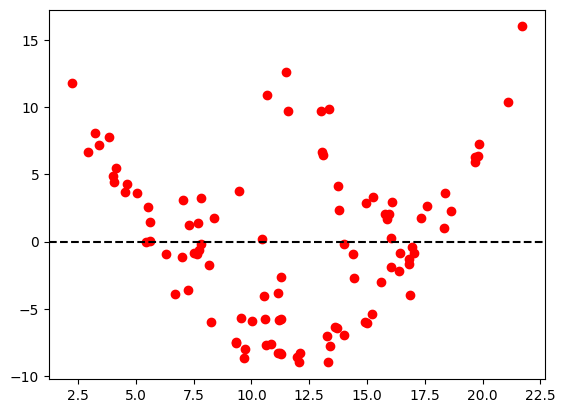

In [ ]:
plt.scatter(pred,residual,color='red')
plt.axhline(y=0,color='black', linestyle='--')
plt.title('predicted vs residual')
plt.show()

#` Adding Polynomial Term`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))

0.4147510231814855
35.668531677133565


In [ ]:
poly_feature=PolynomialFeatures(degree=2)
X_train_trans=poly_feature.fit_transform(X_train)
X_test_trans=poly_feature.transform(X_test)

In [ ]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)
pred_poly_reg=lr.predict(X_test_trans)
print(r2_score(y_test,pred_poly_reg))
print(mean_squared_error(y_test,pred_poly_reg))

0.985903673753096
0.8591134357930242


#` apply trasformation`

In [ ]:
np.random.seed(42)
x= 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
## before trans
lr=LinearRegression()
lr.fit(x,y)
y_pred_original =lr.predict(x)
## after trans
y=np.abs(y)
y_sqrt=np.sqrt(y)
lr1=LinearRegression()
lr1.fit(x,y_sqrt)
y_pred_transformed=lr1.predict(x)

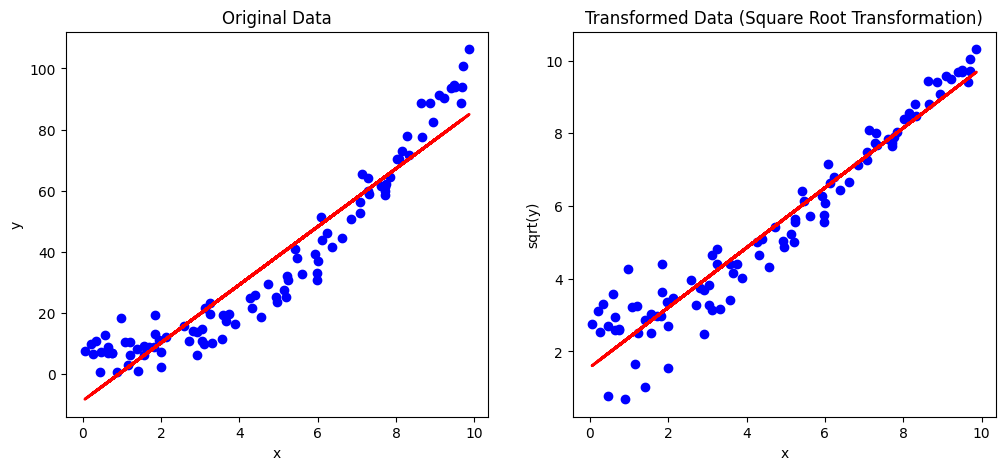

Original linear model
R-squared: 0.9008

Transformed linear model
R-squared: 0.9291


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x, y_sqrt, color='blue')
ax2.plot(x, y_pred_transformed, color='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transformation)')
ax2.set_xlabel('x')
ax2.set_ylabel('sqrt(y)')

plt.show()
# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transformed)

# Compare the performance of the original and transformed models
print("Original linear model")
print(f"R-squared: {r2_original:.4f}")

print("\nTransformed linear model")
print(f"R-squared: {r2_transformed:.4f}")

#`Applying poly. reg`

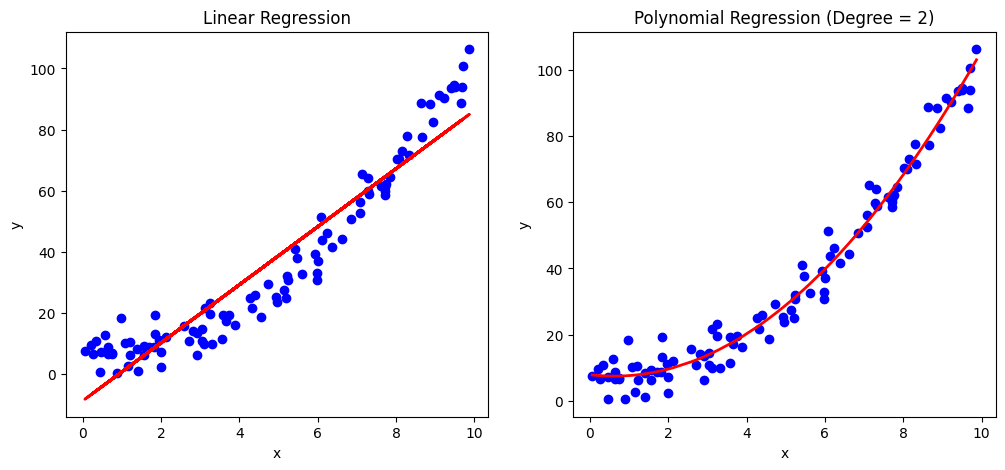

Linear regression
R-squared: 0.9008

Polynomial regression (degree = 2)
R-squared: 0.9782


In [ ]:
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear regression
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_linear, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared for both models
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Compare the performance of the linear and polynomial regression models
print("Linear regression")
print(f"R-squared: {r2_linear:.4f}")

print("\nPolynomial regression (degree = 2)")
print(f"R-squared: {r2_poly:.4f}")


In [ ]:
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
np.random.seed(0)
x = np.random.uniform(0, 10, 100)
y = 3 * x**2 + 2 * x + np.random.normal(0, 5, 100)  # Quadratic relationship with noise

# DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Step 1: Apply Yeo-Johnson Transformation on the target variable
pt = PowerTransformer(method='yeo-johnson')
y_transformed = pt.fit_transform(df[['y']])

# Step 2: Experiment with polynomial degrees
X = df[['x']]
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=0)
results = []

# Test polynomial degrees from 1 to 5
for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Polynomial regression
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    # Performance metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    results.append({
        'degree': degree,
        'train_r2': r2_train,
        'test_r2': r2_test,
        'test_mse': mse_test
    })

# Step 3: Display results
results_df = pd.DataFrame(results)
print(results_df)

   degree  train_r2   test_r2  test_mse
0       1  0.969868  0.977671  0.024697
1       2  0.972756  0.981392  0.020582
2       3  0.973259  0.982452  0.019409
3       4  0.973296  0.982668  0.019170
4       5  0.973304  0.982646  0.019195


##`Piece wise regression`

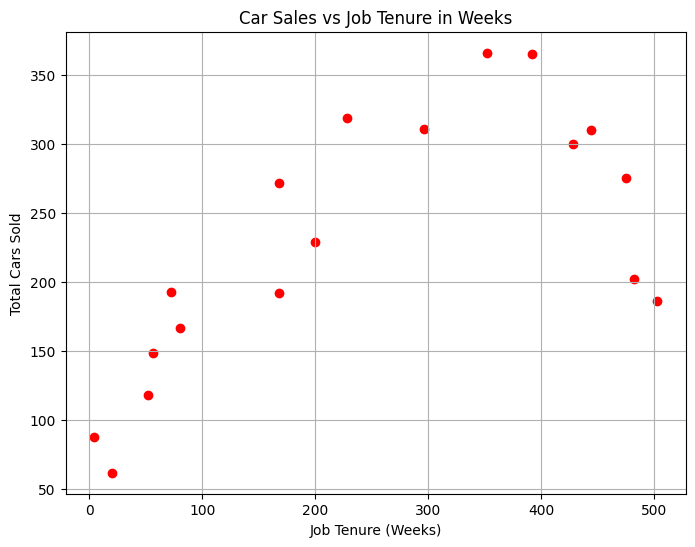

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data from the image
data = {
    'Job Tenure (Weeks)': [168, 428, 296, 503, 392, 80, 56, 352, 444, 482,
                           168, 200, 4, 52, 20, 228, 72, 475],
    'Total Cars Sold': [272, 300, 311, 186, 365, 167, 149, 366, 310, 202,
                        192, 229, 88, 118, 62, 319, 193, 275]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df['Job Tenure (Weeks)'], df['Total Cars Sold'], color='red')
plt.title('Car Sales vs Job Tenure in Weeks')
plt.xlabel('Job Tenure (Weeks)')
plt.ylabel('Total Cars Sold')
plt.grid(True)
plt.show()

In [ ]:
x=df['Job Tenure (Weeks)'].values.reshape(-1,1)
y=df['Total Cars Sold']

In [ ]:
# Fit linear regression model
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

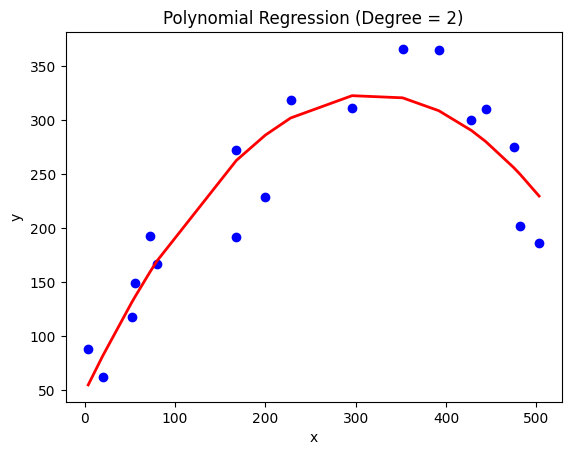


Polynomial regression (degree = 2)
R-squared: 0.8428
                            OLS Regression Results                            
Dep. Variable:        Total Cars Sold   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     40.21
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           9.40e-07
Time:                        13:50:36   Log-Likelihood:                -89.724
No. Observations:                  18   AIC:                             185.4
Df Residuals:                      15   BIC:                             188.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
# Polynomial regression
# Scatter plot of the original data points
plt.scatter(x, y, color='blue')

# Plot the polynomial regression line
plt.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)

# Set title and axis labels
plt.title('Polynomial Regression (Degree = 2)')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


plt.show()

# Calculate R-squared for models
r2_poly = r2_score(y, y_pred_poly)

print("\nPolynomial regression (degree = 2)")
print(f"R-squared: {r2_poly:.4f}")

import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Fit model using statsmodels
X_poly_sm=sm.add_constant(x_poly) # Add constant term
sm_model = sm.OLS(y,X_poly_sm).fit()

# Print the summary
summary = sm_model.summary()
print(summary)

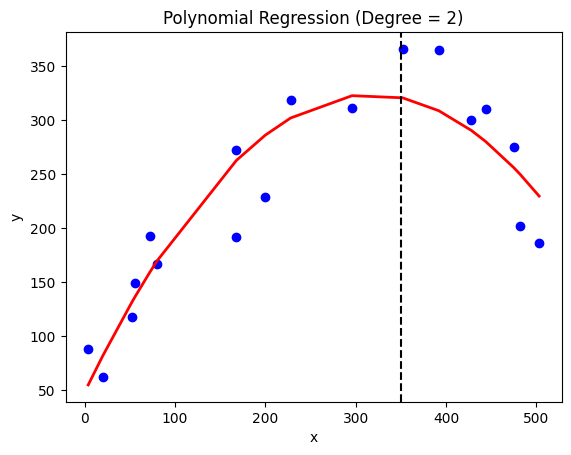

In [ ]:
# Scatter plot of the original data points
plt.scatter(x, y, color='blue')

# Plot the polynomial regression line
plt.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
plt.axvline(x=350,color='black',linestyle='--')
# Set title and axis labels
plt.title('Polynomial Regression (Degree = 2)')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

##`Normality assumption`

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model  import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as s
X=np.random.rand(1000,1)
y=3*X+np.random.normal(0,0.3,(1000,1))
lr=LinearRegression()
lr.fit(X,y)
pred=lr.predict(X)
residual=y-pred

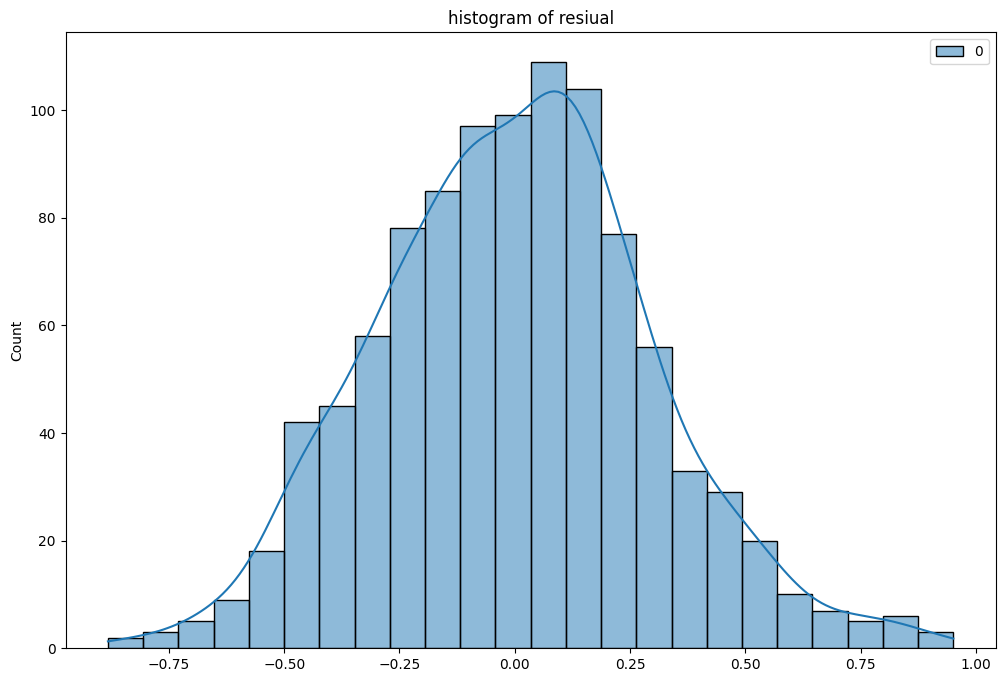

0    0.136246
dtype: float64


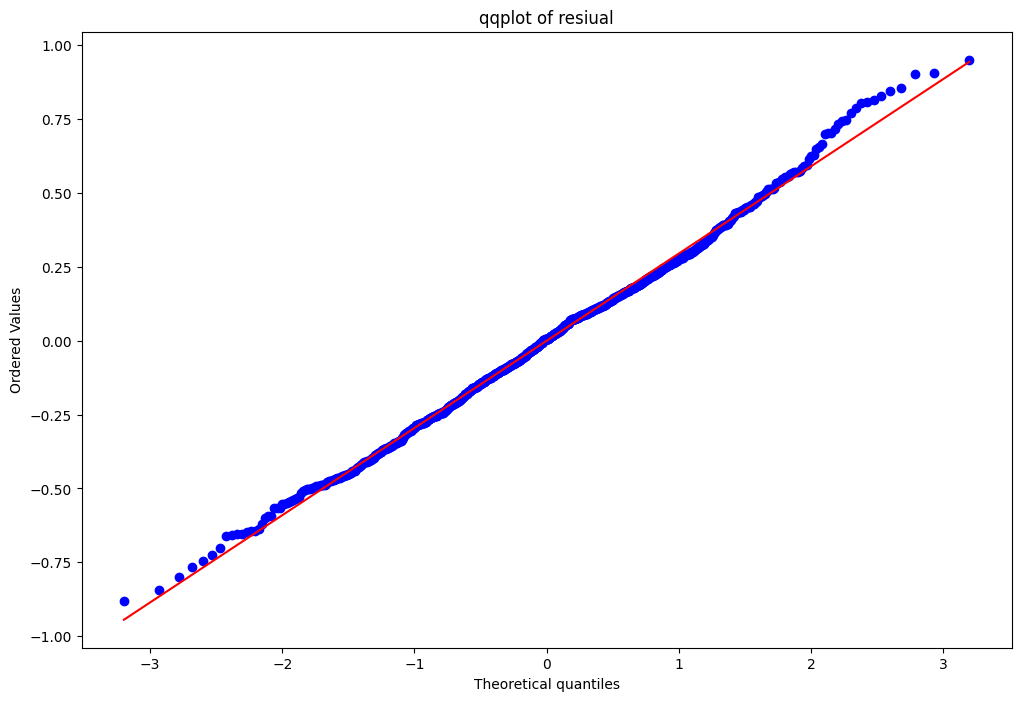

In [ ]:
## histogram of resiual
plt.figure(figsize=(12,8))
sns.histplot(residual,kde=True)
plt.title('histogram of resiual')
plt.show()
print(pd.DataFrame(residual).skew())

## QQ plot of residual
plt.figure(figsize=(12,8))
s.probplot(residual.flatten(),plot=plt)
plt.title('qqplot of resiual')
plt.show()

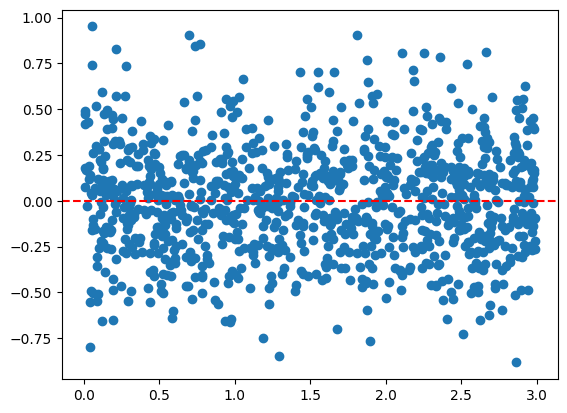

In [ ]:
plt.scatter(pred,residual)
plt.axhline(y=0,color='red',linestyle='--')
## as there is no pattern then we can that normality  assumption hold

##`omnibus test for normality`

In [ ]:
skewness=s.skew(residual)
kurtosis=s.kurtosis(residual)
omnibus_stat,omnibus_p_value=s.normaltest(residual)
print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: 0.1360
Kurtosis: 0.1137
Omnibus test statistic: 3.7692
Omnibus test p-value: 0.1519


In [ ]:
# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

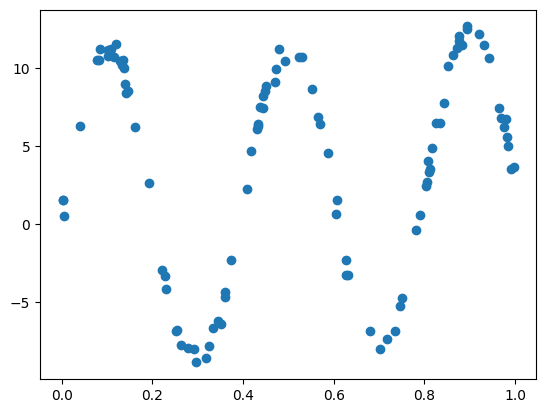

In [ ]:
plt.scatter(x,y)

In [ ]:
lr=LinearRegression()
lr.fit(x,y)
pred=lr.predict(x)
residual=y-pred

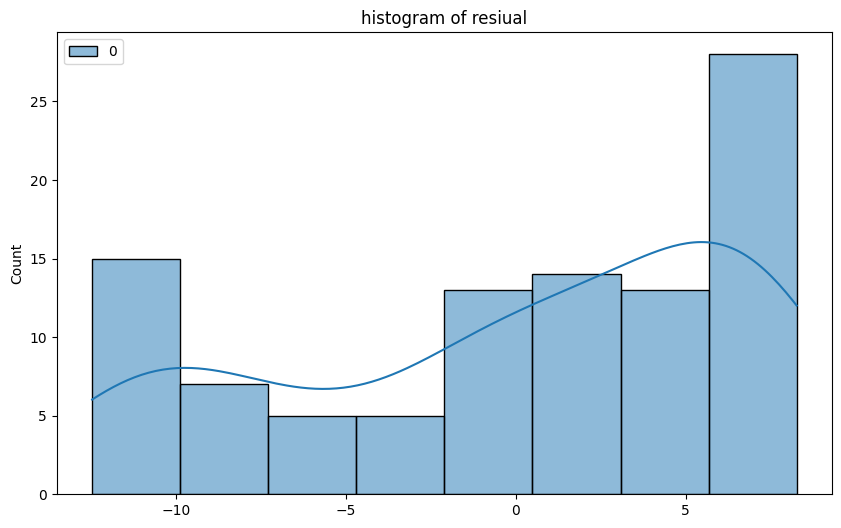

0   -0.532239
dtype: float64


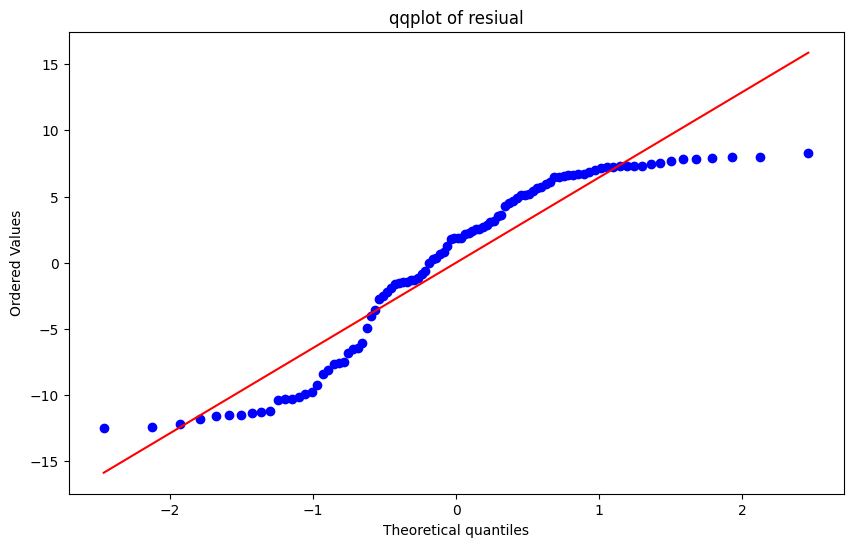

In [ ]:
## histogram of resiual
plt.figure(figsize=(10,6))
sns.histplot(residual,kde=True)
plt.title('histogram of resiual')
plt.show()
print(pd.DataFrame(residual).skew())

## QQ plot of residual
plt.figure(figsize=(10,6))
s.probplot(residual.flatten(),plot=plt)
plt.title('qqplot of resiual')
plt.show()

##`omnibus test for normality`

In [ ]:
skewness=s.skew(residual)
kurtosis=s.kurtosis(residual)
omnibus_stat,omnibus_p_value=s.normaltest(residual)

In [ ]:
print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: -0.5242
Kurtosis: -1.0875
Omnibus test statistic: 25.0144
Omnibus test p-value: 0.0000


#`homoscadaticity`

In [ ]:
2 * x + 1 + np.random.normal(0, x, len(x))

array([ 1.        ,  1.39489057,  1.1215015 ,  1.77665734,  1.54519492,
        1.76407809,  1.85309459,  1.80323885,  2.65537101,  2.06277262,
        3.29339073,  3.1664021 ,  3.13460843,  2.43451236,  3.0126466 ,
        5.17483519,  5.04188636,  2.75571322,  4.81696783,  6.28043993,
        1.66786812,  6.39500647,  3.9719472 ,  6.97209792,  3.99815962,
        1.49272197,  1.97817138,  6.58568622,  7.39113435,  4.20957756,
        8.99573472,  2.05988667,  7.2510552 ,  3.629946  ,  5.63005781,
        8.23827813,  5.1439514 ,  7.03751968, 12.53930573,  6.60618354,
       12.45734187,  4.60424434, 11.73250257, 15.94822734, -1.09619778,
        6.46865793, 12.97427453,  9.53099665, 12.49646484,  7.90956827,
       11.53833226, 10.50105667, 17.63885527, 13.06912169, 13.75055997,
        9.82290574,  9.55495469, 10.02466498, 15.02810346, 10.41029451,
       14.87742338, 26.11105543, 18.98078097, 11.65257752, 21.69471626,
       11.45203038,  0.74583643,  7.71295123,  1.88748984, 12.48

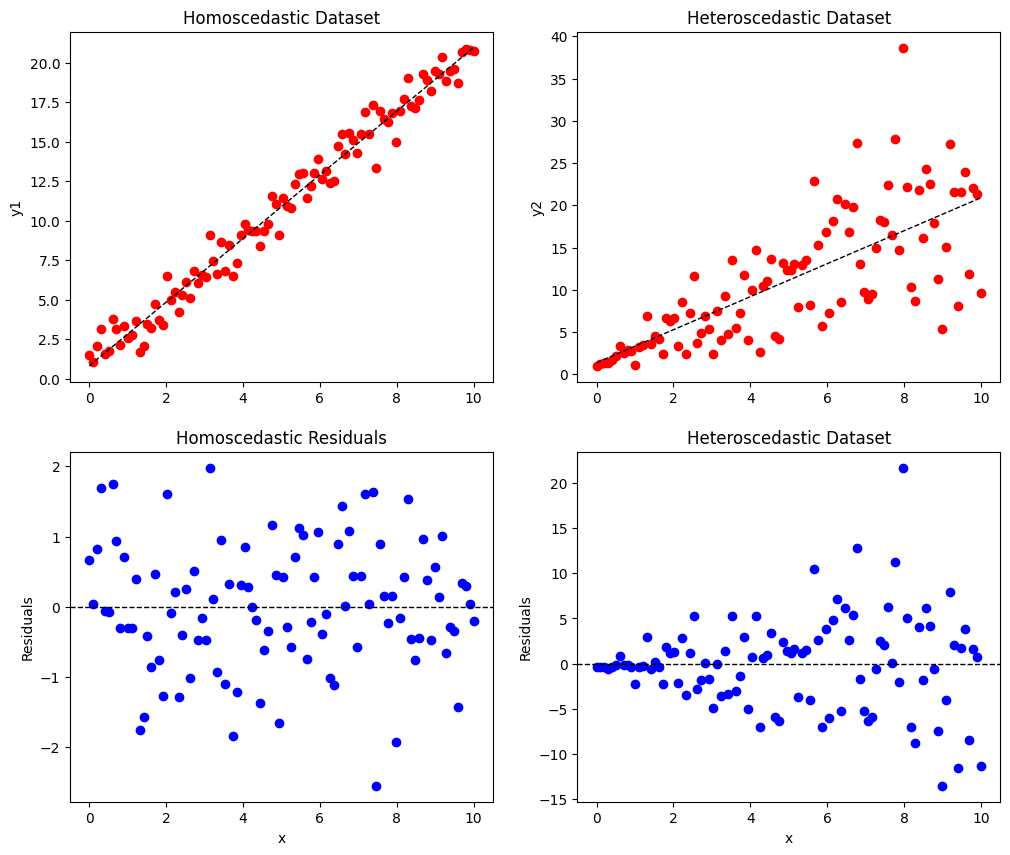

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 10, 100)

# Homoscedastic dataset
y1 = 2 * x + 1 + np.random.normal(0, 1, len(x))

# Heteroscedastic dataset
y2 = 2 * x + 1 + np.random.normal(0, x, len(x))

coef1=np.polyfit(x,y1,1)
pred_y1=np.polyval(coef1,x)
residual_y1=y1-pred_y1

coef2=np.polyfit(x,y2,1)
pred_y2=np.polyval(coef2,x)
residual_y2=y2-pred_y2

fig,ax=plt.subplots(2,2,figsize=(12,10))

ax[0,0].scatter(x,y1,color='red')
ax[0,0].plot(x,pred_y1, color='black', linestyle='--', lw=1)
ax[0, 0].set_title('Homoscedastic Dataset')
ax[0, 0].set_ylabel('y1')

ax[0,1].scatter(x,y2,color='red')
ax[0,1].plot(x,pred_y2, color='black', linestyle='--', lw=1)
ax[0, 1].set_title('Heteroscedastic Dataset')
ax[0, 1].set_ylabel('y2')

# Plot residuals for dataset 1
ax[1, 0].scatter(x, residual_y1, color='blue')
ax[1, 0].axhline(0, color='black', linestyle='--', lw=1)
ax[1, 0].set_title('Homoscedastic Residuals')
ax[1, 0].set_xlabel('x')
ax[1, 0].set_ylabel('Residuals')

# Plot residuals for dataset 1
ax[1, 1].scatter(x, residual_y2, color='blue')
ax[1, 1].axhline(0, color='black', linestyle='--', lw=1)
ax[1, 1].set_title('Heteroscedastic Dataset')
ax[1, 1].set_xlabel('x')
ax[1, 1].set_ylabel('Residuals')

plt.show()

In [ ]:
import statsmodels.api as s
from statsmodels.stats.diagnostic import het_breuschpagan

coef1=s.add_constant(x)
ols1=s.OLS(y1,coef1).fit()

coef2=s.add_constant(x)
ols2=s.OLS(y2,coef2).fit()

bpt_test1=het_breuschpagan(ols1.resid,coef1)
bpt_test2=het_breuschpagan(ols2.resid,coef2)

print("Homoscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bpt_test1[0]}\nLM-Test p-value: {bpt_test1[1]}\nF-Statistic: {bpt_test1[2]}\nF-Test p-value: {bpt_test1[3]}\n")

print("Heteroscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bpt_test2[0]}\nLM-Test p-value: {bpt_test2[1]}\nF-Statistic: {bpt_test2[2]}\nF-Test p-value: {bpt_test2[3]}")

Homoscedastic dataset - Breusch-Pagan test results:
LM Statistic: 0.2728976751265155
LM-Test p-value: 0.6013945776291327
F-Statistic: 0.2681715555644711
F-Test p-value: 0.6057280388642075

Heteroscedastic dataset - Breusch-Pagan test results:
LM Statistic: 13.074070036062702
LM-Test p-value: 0.0002994118347711689
F-Statistic: 14.739662423694476
F-Test p-value: 0.00021882735433543382


##`Multicollinearity`

In [12]:
import numpy as np
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
arr

array([[ 1. ,  1. ,  1.2],
       [ 1. ,  2. ,  2.1],
       [ 1. ,  3. ,  3.1],
       [ 1. ,  4. ,  4.1],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  6. ,  6. ],
       [ 1. ,  7. ,  7. ],
       [ 1. ,  8. ,  8. ],
       [ 1. ,  9. ,  9.1],
       [ 1. , 10. , 10.2]])

In [3]:
np.linalg.inv(np.dot(arr.T,arr))

array([[  0.67713004,   1.89686099,  -1.97309417],
       [  1.89686099,  18.3309417 , -18.40807175],
       [ -1.97309417, -18.40807175,  18.49775785]])

In [4]:
import numpy as np
arr = np.array([[1,1,1,1,1,1,1,1,1,1],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1.1, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.2]]).T
arr

array([[ 1. ,  1. ,  1.1],
       [ 1. ,  2. ,  2.1],
       [ 1. ,  3. ,  3.1],
       [ 1. ,  4. ,  4.1],
       [ 1. ,  5. ,  5. ],
       [ 1. ,  6. ,  6. ],
       [ 1. ,  7. ,  7. ],
       [ 1. ,  8. ,  8. ],
       [ 1. ,  9. ,  9.1],
       [ 1. , 10. , 10.2]])

In [5]:
np.linalg.inv(np.dot(arr.T,arr))

array([[  0.57514793,   1.56153846,  -1.62721893],
       [  1.56153846,  24.45      , -24.42307692],
       [ -1.62721893, -24.42307692,  24.40828402]])

In [14]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: >

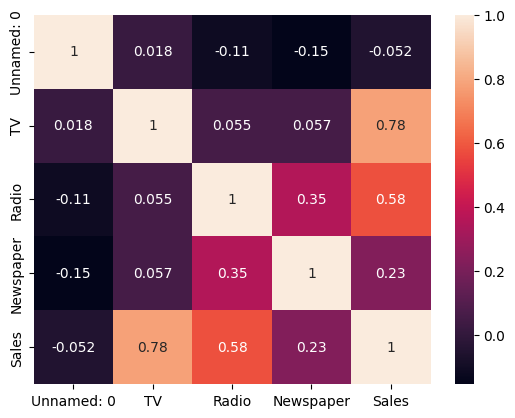

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
## vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(3):
  vif.append(variance_inflation_factor(df.iloc[:,1:4],i))

In [9]:
vif

[2.486771835198193, 3.285462100162896, 3.0552445106573853]

In [13]:
## condition number
np.linalg.cond(np.dot(arr.T,arr))

29104.19736331761

In [15]:
X = df.drop(['Sales'], axis=1)
# Calculate the condition number
condition_number = np.linalg.cond(X)
print("Condition number:", condition_number)

Condition number: 14.558532227416231


##`Remove the highly correlated column`

In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

X,y= make_regression(n_samples=100,n_features=3,noise=0.5)
X[:, 1] = X[:, 0] + 0.1 * np.random.normal(size=100)

data=pd.DataFrame(X,columns=['x1','x2','x3'])
data['y']=y
data

,x1,x2,x3,y
0,-0.336021,-0.531687,2.126988,23.912946
1,-1.131846,-1.295991,-1.314089,-104.003457
2,0.854204,0.879432,0.654723,80.594014
3,-0.747898,-0.678412,-2.856951,-145.049353
4,2.350867,2.333859,-1.394025,78.656523
...,...,...,...,...
95,1.482937,1.561572,-1.276111,-6.162926
96,0.953954,0.909282,-0.328965,99.696355
97,0.358957,0.307023,0.957167,19.299081
98,-1.720366,-1.626565,0.710081,-46.645747


In [31]:
condition_number = np.linalg.cond(data.iloc[:,0:3])
print("Condition number:", condition_number)

Condition number: 18.218526069488597


In [33]:
data_with_constant=sm.add_constant(data[['x1','x2','x3']])
data_with_constant_reduce=sm.add_constant(data[['x1','x3']])
model1=sm.OLS(data['y'],data_with_constant).fit()
model2=sm.OLS(data['y'],data_with_constant_reduce).fit()

In [34]:
# Print the summary
summary = model1.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     242.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.24e-44
Time:                        15:57:30   Log-Likelihood:                -448.18
No. Observations:                 100   AIC:                             904.4
Df Residuals:                      96   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6400      2.194      1.659      0.1

In [35]:
# Print the summary
summary = model2.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     362.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.01e-45
Time:                        15:57:31   Log-Likelihood:                -448.77
No. Observations:                 100   AIC:                             903.5
Df Residuals:                      97   BIC:                             911.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5416      2.194      1.614      0.1

#`Add the highly correlated column`

In [36]:
data

,x1,x2,x3,y
0,-0.336021,-0.531687,2.126988,23.912946
1,-1.131846,-1.295991,-1.314089,-104.003457
2,0.854204,0.879432,0.654723,80.594014
3,-0.747898,-0.678412,-2.856951,-145.049353
4,2.350867,2.333859,-1.394025,78.656523
...,...,...,...,...
95,1.482937,1.561572,-1.276111,-6.162926
96,0.953954,0.909282,-0.328965,99.696355
97,0.358957,0.307023,0.957167,19.299081
98,-1.720366,-1.626565,0.710081,-46.645747


In [37]:
data['X_combine']=(data['x1']+data['x2'])/2

In [38]:
data_with_constant=sm.add_constant(data[['x1','x2','x3']])
data_with_constant_reduce=sm.add_constant(data[['X_combine','x3']])
model3=sm.OLS(data['y'],data_with_constant).fit()
model4=sm.OLS(data['y'],data_with_constant_reduce).fit()

In [39]:
# Print the summary
summary = model3.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     242.1
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.24e-44
Time:                        16:09:33   Log-Likelihood:                -448.18
No. Observations:                 100   AIC:                             904.4
Df Residuals:                      96   BIC:                             914.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6400      2.194      1.659      0.1

In [40]:
# Print the summary
summary = model4.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     367.0
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           5.73e-46
Time:                        16:09:33   Log-Likelihood:                -448.18
No. Observations:                 100   AIC:                             902.4
Df Residuals:                      97   BIC:                             910.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6459      2.181      1.672      0.0

##`simple Polynomial Regression`|

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [ ]:
X=6 * np.random.rand(200,1)-3
y=0.8*X**2+0.7*X+0.2 +np.random.randn(200,1)

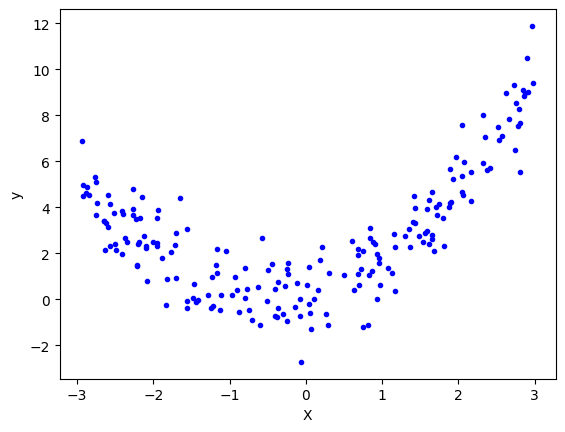

In [ ]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred=model.predict(X_test)

In [ ]:
print(model.coef_)
print(model.intercept_)

[[0.61489042]]
[2.77087515]


In [ ]:
print(r2_score(y_test,pred))

0.21255791292368809


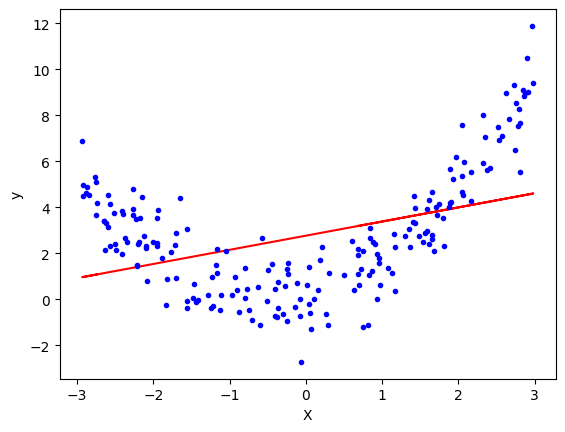

In [ ]:
plt.plot(X_train,model.predict(X_train),color='red')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
ploy=PolynomialFeatures(degree=2,include_bias=True)

In [ ]:
X_train_trans=ploy.fit_transform(X_train)
X_test_trans=ploy.transform(X_test)

In [ ]:
print(X_train[0])
print(X_train_trans[0])

[0.69131663]
[1.         0.69131663 0.47791868]


In [ ]:
model=LinearRegression()
model.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
pred=model.predict(X_test_trans)

In [ ]:
print(r2_score(y_test,pred))

0.8470111606911879


In [ ]:
print(model.coef_)
print(model.intercept_)

[[0.         0.71214581 0.79233002]]
[0.33013499]


In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = ploy.transform(X_new)
y_new = model.predict(X_new_poly)

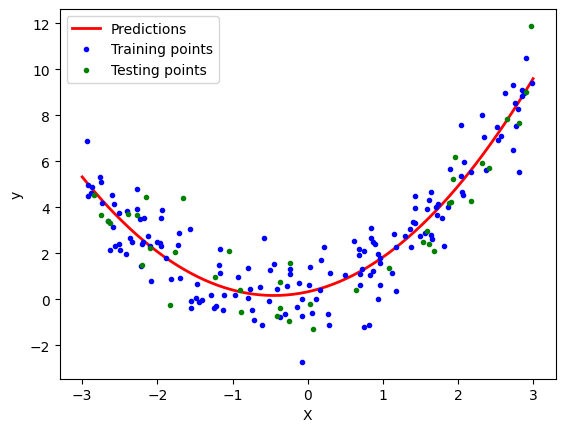

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = ploy.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

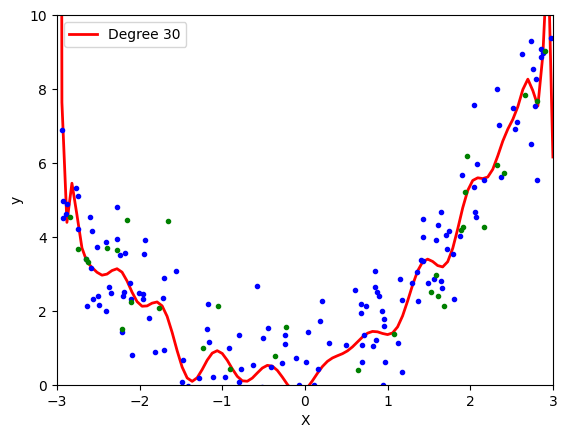

In [ ]:
polynomial_regression(30)

## `multiple polynomial reg.`

In [ ]:
x=7 * np.random.rand(100,1)-2.8
y=7 * np.random.rand(100,1)-2.8

z=x**2+y**2+0.2*x+0.2*y+0.1*x*y+2+np.random.randn(100,1)

In [ ]:
import plotly.express as px
data=px.data.iris()
fig=px.scatter_3d(data,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [ ]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

LinearRegression()